In [2]:
import joblib# Define thresholds for very short and very long sentences (you can adjust these thresholds as needed)
X_test_terms = joblib.load('cve_core_terms/reproduc/X_test.joblib')
y_test_terms = joblib.load('cve_core_terms/reproduc/y_test.joblib')
unbalanced_terms = joblib.load('cve_core_terms/reproduc/unbalanced.joblib')
y_pred_original_terms = joblib.load('cve_core_terms/reproduc/y_pred_original.joblib')

In [3]:
import joblib# Define thresholds for very short and very long sentences (you can adjust these thresholds as needed)
X_test_descr = joblib.load('cve_descr/reproduc1/X_test.joblib')
y_test_descr = joblib.load('cve_descr/reproduc1/y_test.joblib')
y_pred_original_descr = joblib.load('cve_descr/reproduc1/y_pred_original.joblib')
unbalanced_descr = joblib.load('cve_descr/reproduc1/unbalanced.joblib')


In [4]:
misclassified_sentences = 0
total_sentences = len(X_test_terms)

# Loop through all samples, including misclassified ones
for i, (sample, actual_label, predicted_label) in enumerate(zip(X_test_terms, y_test_terms, y_pred_original_terms)):
    # Check if the prediction is incorrect
    if actual_label != predicted_label:
        misclassified_sentences += 1

# Calculate the percentage of misclassified sentences
percentage_misclassified_terms = (misclassified_sentences / total_sentences) * 100

In [5]:
misclassified_sentences = 0
total_sentences = len(X_test_descr)

# Loop through all samples, including misclassified ones
for i, (sample, actual_label, predicted_label) in enumerate(zip(X_test_descr, y_test_descr, y_pred_original_descr)):
    # Check if the prediction is incorrect
    if actual_label != predicted_label:
        misclassified_sentences += 1

# Calculate the percentage of misclassified sentences
percentage_misclassified_descr  = (misclassified_sentences / total_sentences) * 100

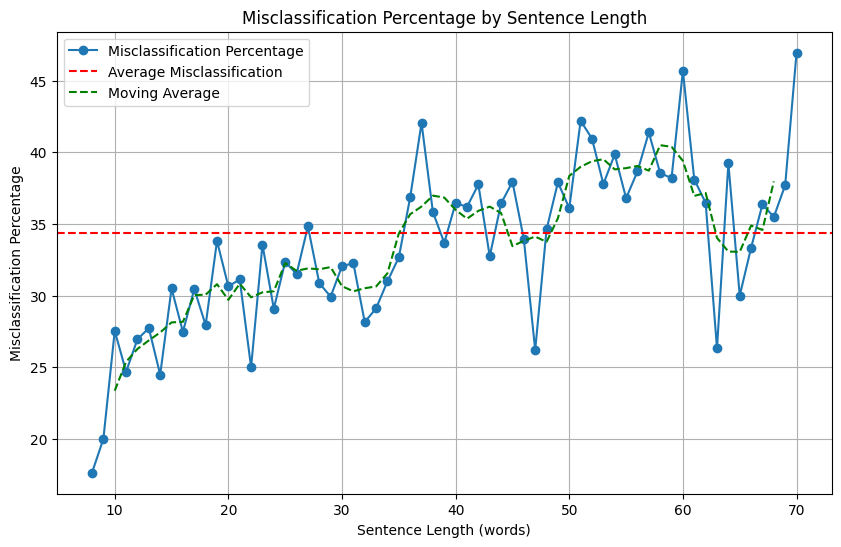

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize dictionaries to store misclassified and total sentences for each length
misclassified_by_length = {}
total_by_length = {}

# Loop through all samples
for i, (sample, actual_label, predicted_label) in enumerate(zip(X_test_terms, y_test_terms, y_pred_original_terms)):
    # Extract the description from the original data dictionary
    description = unbalanced_terms[i]['cve_description']
    
    # Calculate description length in terms of words
    description_words = len(description.split())
    
    # Exclude sentences with more than 120 words
    if description_words > 70 or description_words < 8:
        continue
    
    # Check if the length is already recorded
    if description_words in misclassified_by_length:
        # Update misclassified count
        if actual_label != predicted_label:
            misclassified_by_length[description_words] += 1
        total_by_length[description_words] += 1
    else:
        # Initialize counts for the new length
        misclassified_by_length[description_words] = 1 if actual_label != predicted_label else 0
        total_by_length[description_words] = 1

# Calculate misclassification percentage for each length
misclassification_percentage_by_length = {}
for length, misclassified_count in misclassified_by_length.items():
    total_count = total_by_length[length]
    misclassification_percentage_by_length[length] = (misclassified_count / total_count) * 100 if total_count > 0 else 0

# Sort the lengths
sorted_lengths = sorted(misclassification_percentage_by_length.keys())

# Prepare data for plotting
lengths = [length for length in sorted_lengths]
misclassification_percentages_terms = [misclassification_percentage_by_length[length] for length in sorted_lengths]

# Calculate average misclassification percentage
average_misclassification_terms = np.mean(misclassification_percentages_terms)

# Calculate moving average with window size 5
moving_average_terms = np.convolve(misclassification_percentages_terms, np.ones(5)/5, mode='same')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(lengths, misclassification_percentages_terms, marker='o', linestyle='-', label='Misclassification Percentage')
plt.axhline(y=percentage_misclassified_terms, color='red', linestyle='--', label='Average Misclassification')
plt.plot(lengths[2:-2], moving_average_terms[2:-2], color='green', linestyle='--', label='Moving Average')
plt.title('Misclassification Percentage by Sentence Length')
plt.xlabel('Sentence Length (words)')
plt.ylabel('Misclassification Percentage')
plt.legend()
plt.grid(True)
plt.show()

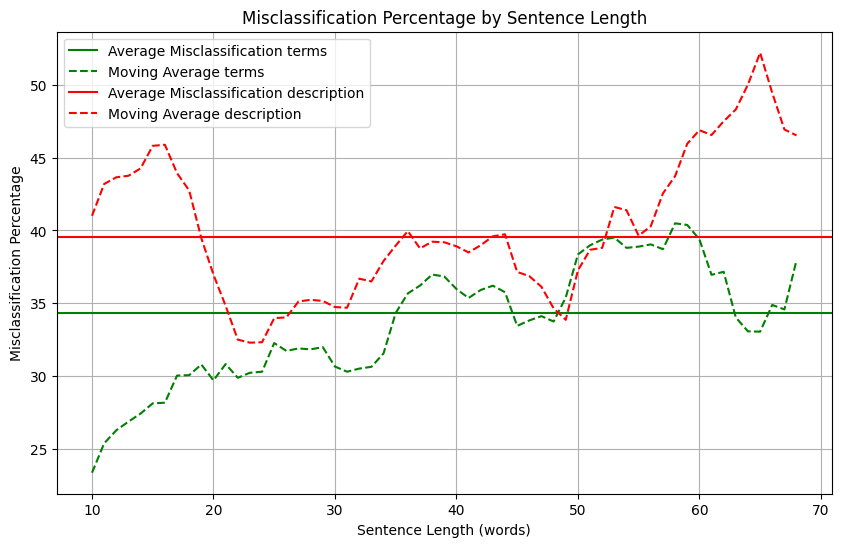

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize dictionaries to store misclassified and total sentences for each length
misclassified_by_length = {}
total_by_length = {}

# Loop through all samples
for i, (sample, actual_label, predicted_label) in enumerate(zip(X_test_descr, y_test_descr, y_pred_original_descr)):
    # Extract the description from the original data dictionary
    description = unbalanced_descr[i]['cve_description']
    
    # Calculate description length in terms of words
    description_words = len(description.split())
    
    # Exclude sentences with more than 120 words
    if description_words > 70 or description_words < 8:

        continue
    
    # Check if the length is already recorded
    if description_words in misclassified_by_length:
        # Update misclassified count
        if actual_label != predicted_label:
            misclassified_by_length[description_words] += 1
        total_by_length[description_words] += 1
    else:
        # Initialize counts for the new length
        misclassified_by_length[description_words] = 1 if actual_label != predicted_label else 0
        total_by_length[description_words] = 1

# Calculate misclassification percentage for each length
misclassification_percentage_by_length = {}
for length, misclassified_count in misclassified_by_length.items():
    total_count = total_by_length[length]
    misclassification_percentage_by_length[length] = (misclassified_count / total_count) * 100 if total_count > 0 else 0

# Sort the lengths
sorted_lengths = sorted(misclassification_percentage_by_length.keys())

# Prepare data for plotting
lengths = [length for length in sorted_lengths]
misclassification_percentages_descr = [misclassification_percentage_by_length[length] for length in sorted_lengths]

# Calculate average misclassification percentage
average_misclassification_descr = np.mean(misclassification_percentages_descr)

# Calculate moving average with window size 5
moving_average_descr = np.convolve(misclassification_percentages_descr, np.ones(5)/5, mode='same')

# Plot the data
plt.figure(figsize=(10, 6))
# plt.plot(lengths, misclassification_percentages_descr, marker='o', linestyle='-', label='Misclassification Percentage')
plt.axhline(y=percentage_misclassified_terms, color='green', linestyle='-', label='Average Misclassification terms')
plt.plot(lengths[2:-2], moving_average_terms[2:-2], color='green', linestyle='--', label='Moving Average terms')
plt.axhline(y=percentage_misclassified_descr, color='red', linestyle='-', label='Average Misclassification description')
plt.plot(lengths[2:-2], moving_average_descr[2:-2], color='red', linestyle='--', label='Moving Average description')
plt.title('Misclassification Percentage by Sentence Length')
plt.xlabel('Sentence Length (words)')
plt.ylabel('Misclassification Percentage')
plt.legend()
plt.grid(True)
plt.show()


Word Length Distribution:
Length 5: 6 descriptions
Length 6: 12 descriptions
Length 7: 19 descriptions
Length 8: 17 descriptions
Length 9: 50 descriptions
Length 10: 69 descriptions
Length 11: 81 descriptions
Length 12: 115 descriptions
Length 13: 119 descriptions
Length 14: 147 descriptions
Length 15: 141 descriptions
Length 16: 182 descriptions
Length 17: 174 descriptions
Length 18: 204 descriptions
Length 19: 210 descriptions
Length 20: 235 descriptions
Length 21: 257 descriptions
Length 22: 280 descriptions
Length 23: 301 descriptions
Length 24: 330 descriptions
Length 25: 377 descriptions
Length 26: 346 descriptions
Length 27: 379 descriptions
Length 28: 379 descriptions
Length 29: 401 descriptions
Length 30: 418 descriptions
Length 31: 341 descriptions
Length 32: 412 descriptions
Length 33: 426 descriptions
Length 34: 342 descriptions
Length 35: 401 descriptions
Length 36: 331 descriptions
Length 37: 333 descriptions
Length 38: 335 descriptions
Length 39: 288 descriptions
Length 

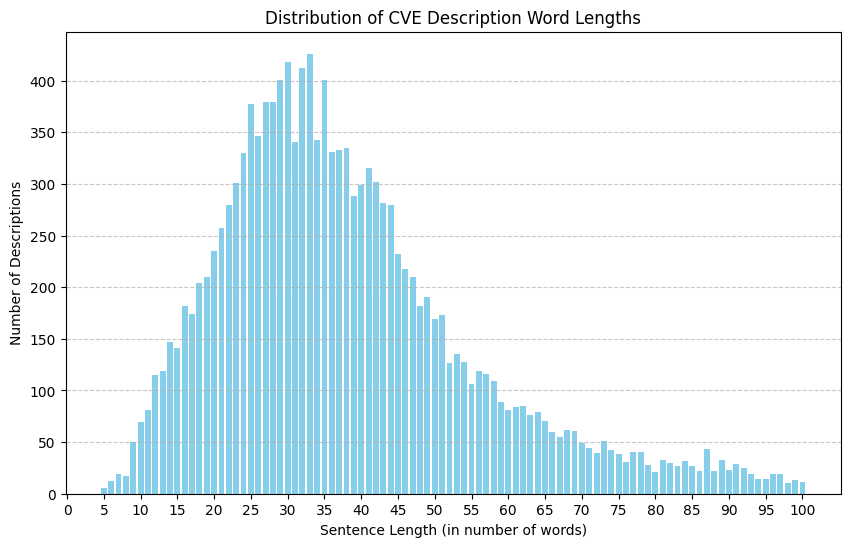

In [18]:
import matplotlib.pyplot as plt
word_length_distribution = {}

for i, (sample, actual_label, predicted_label) in enumerate(zip(X_test_descr, y_test_descr, y_pred_original_descr)):
    # Extract the description from the original data dictionary
    description = unbalanced_descr[i]['cve_description']
    
    # Calculate description length in terms of words
    description_words = len(description.split())
    
    # Exclude sentences with more than 120 words
    if description_words > 100:
        continue

    # Update word length distribution
    if description_words in word_length_distribution:
        word_length_distribution[description_words] += 1
    else:
        word_length_distribution[description_words] = 1

# Print word length distribution
print("Word Length Distribution:")
for length, count in sorted(word_length_distribution.items()):
    print(f"Length {length}: {count} descriptions")


# Convert word length distribution dictionary to lists for plotting
lengths, counts = zip(*sorted(word_length_distribution.items()))

# Plot word length distribution
plt.figure(figsize=(10, 6))
plt.bar(lengths, counts, color='skyblue')
plt.xlabel('Sentence Length (in number of words)')
plt.ylabel('Number of Descriptions')
plt.title('Distribution of CVE Description Word Lengths')
plt.xticks(range(0, max(lengths)+1, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
